In [1]:
# Import necessary libraries

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

import matplotlib.pyplot as plt  # For plotting visualizations
import seaborn as sns  

from collections import Counter  # For counting elements in an array

from sklearn.decomposition import PCA  # For Principal Component Analysis (dimensionality reduction)

from sklearn.model_selection import RandomizedSearchCV  # For hyperparameter tuning

# Importing classifiers
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Importing metrics
from sklearn.metrics import confusion_matrix  # For creating confusion matrices
from sklearn.metrics import accuracy_score  # For calculating accuracy
from sklearn.metrics import classification_report  

In [2]:

train = pd.read_csv('train.csv')  # Load the training dataset
test = pd.read_csv('test.csv')  # Load the test dataset


In [3]:
train.head()  # Display first 5 rows of the DataFrame


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.shape  # Returns the dimensions of the DataFrame 'train'


(7352, 563)

In [5]:
test.shape  # Returns the dimensions of the DataFrame 'test'


(999, 563)

In [6]:
train.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
c=1
for i in train.columns:  
    print("[",c,"]",i,end=" , ")  
    c+=1

[ 1 ] tBodyAcc-mean()-X , [ 2 ] tBodyAcc-mean()-Y , [ 3 ] tBodyAcc-mean()-Z , [ 4 ] tBodyAcc-std()-X , [ 5 ] tBodyAcc-std()-Y , [ 6 ] tBodyAcc-std()-Z , [ 7 ] tBodyAcc-mad()-X , [ 8 ] tBodyAcc-mad()-Y , [ 9 ] tBodyAcc-mad()-Z , [ 10 ] tBodyAcc-max()-X , [ 11 ] tBodyAcc-max()-Y , [ 12 ] tBodyAcc-max()-Z , [ 13 ] tBodyAcc-min()-X , [ 14 ] tBodyAcc-min()-Y , [ 15 ] tBodyAcc-min()-Z , [ 16 ] tBodyAcc-sma() , [ 17 ] tBodyAcc-energy()-X , [ 18 ] tBodyAcc-energy()-Y , [ 19 ] tBodyAcc-energy()-Z , [ 20 ] tBodyAcc-iqr()-X , [ 21 ] tBodyAcc-iqr()-Y , [ 22 ] tBodyAcc-iqr()-Z , [ 23 ] tBodyAcc-entropy()-X , [ 24 ] tBodyAcc-entropy()-Y , [ 25 ] tBodyAcc-entropy()-Z , [ 26 ] tBodyAcc-arCoeff()-X,1 , [ 27 ] tBodyAcc-arCoeff()-X,2 , [ 28 ] tBodyAcc-arCoeff()-X,3 , [ 29 ] tBodyAcc-arCoeff()-X,4 , [ 30 ] tBodyAcc-arCoeff()-Y,1 , [ 31 ] tBodyAcc-arCoeff()-Y,2 , [ 32 ] tBodyAcc-arCoeff()-Y,3 , [ 33 ] tBodyAcc-arCoeff()-Y,4 , [ 34 ] tBodyAcc-arCoeff()-Z,1 , [ 35 ] tBodyAcc-arCoeff()-Z,2 , [ 36 ] tBodyAcc-a

#### Time-Domain Features

- **tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z**: Mean values of body acceleration along the X, Y, and Z axes.
- **tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z**: Standard deviation of body acceleration along the X, Y, and Z axes.
- **tBodyGyro-mean()-X, tBodyGyro-mean()-Y, tBodyGyro-mean()-Z**: Mean values of body angular velocity (gyroscope) along the X, Y, and Z axes.

#### Frequency-Domain Features

- **fBodyAcc-mean()-X, fBodyAcc-mean()-Y, fBodyAcc-mean()-Z**: Mean values of body acceleration in the frequency domain along the X, Y, and Z axes.
- **fBodyAcc-std()-X, fBodyAcc-std()-Y, fBodyAcc-std()-Z**: Standard deviation of body acceleration in the frequency domain along the X, Y, and Z axes.
- **fBodyGyro-mean()-X, fBodyGyro-mean()-Y, fBodyGyro-mean()-Z**: Mean values of body angular velocity (gyroscope) in the frequency domain along the X, Y, and Z axes.

#### Magnitude Features

- **tBodyAccMag-mean(), tBodyAccMag-std(), tBodyAccMag-mad()**: Mean, standard deviation, and median absolute deviation of the magnitude of body acceleration.
- **fBodyAccMag-mean(), fBodyAccMag-std(), fBodyAccMag-mad()**: Mean, standard deviation, and median absolute deviation of the magnitude of body acceleration in the frequency domain.

#### Additional Features

- **angle(tBodyAccMean,gravity)**: Angle between the mean body acceleration and gravity.
- **subject**: Identifier for the subject performing the activity.
- **Activity**: The label or identifier for the activity being performed (e.g., walking, sitting, etc.).

#### Statistical Measures

- **mean()**: Mean value.
- **std()**: Standard deviation.
- **mad()**: Median absolute deviation.
- **max(), min()**: Maximum and minimum values.
- **sma()**: Signal magnitude area.
- **energy()**: Energy measure.
- **iqr()**: Interquartile range.
- **entropy()**: Signal entropy.
- **arCoeff()**: Autoregressive coefficients.
- **correlation()**: Correlation coefficient.
- **skewness(), kurtosis()**: Skewness and kurtosis.


In [8]:
train['Activity'].unique()  


array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
train['Activity'].nunique()  


6

In [10]:
train['subject'].unique()  


array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [11]:
train['subject'].nunique() 


21

In [12]:
# Grouping the 'train' DataFrame by 'Activity' column and counting occurrences
activity_counts = train.groupby('Activity').size().reset_index(name='count')

print("Total Activity Counts:")
print(activity_counts)


Total Activity Counts:
             Activity  count
0              LAYING   1407
1             SITTING   1286
2            STANDING   1374
3             WALKING   1226
4  WALKING_DOWNSTAIRS    986
5    WALKING_UPSTAIRS   1073


In [13]:
# Grouping the 'test' DataFrame by 'Activity' column and counting occurrences
activity_counts = test.groupby('Activity').size().reset_index(name='count')

print("Total Activity Counts:")
print(activity_counts)


Total Activity Counts:
             Activity  count
0              LAYING    183
1             SITTING    170
2            STANDING    178
3             WALKING    185
4  WALKING_DOWNSTAIRS    134
5    WALKING_UPSTAIRS    149


In [14]:
# Group by 'subject' and count occurrences of each 'Activity'
grouped_data = train.groupby('subject')['Activity'].value_counts()

for subject, activity_counts in grouped_data.groupby(level=0):
    print(f"Subject {subject}:")
    for activity, count in activity_counts.items():
        print(f"  {activity}: {count}")


Subject 1:
  (1, 'WALKING'): 95
  (1, 'STANDING'): 53
  (1, 'WALKING_UPSTAIRS'): 53
  (1, 'LAYING'): 50
  (1, 'WALKING_DOWNSTAIRS'): 49
  (1, 'SITTING'): 47
Subject 3:
  (3, 'LAYING'): 62
  (3, 'STANDING'): 61
  (3, 'WALKING_UPSTAIRS'): 59
  (3, 'WALKING'): 58
  (3, 'SITTING'): 52
  (3, 'WALKING_DOWNSTAIRS'): 49
Subject 5:
  (5, 'STANDING'): 56
  (5, 'WALKING'): 56
  (5, 'LAYING'): 52
  (5, 'WALKING_DOWNSTAIRS'): 47
  (5, 'WALKING_UPSTAIRS'): 47
  (5, 'SITTING'): 44
Subject 6:
  (6, 'LAYING'): 57
  (6, 'STANDING'): 57
  (6, 'WALKING'): 57
  (6, 'SITTING'): 55
  (6, 'WALKING_UPSTAIRS'): 51
  (6, 'WALKING_DOWNSTAIRS'): 48
Subject 7:
  (7, 'WALKING'): 57
  (7, 'STANDING'): 53
  (7, 'LAYING'): 52
  (7, 'WALKING_UPSTAIRS'): 51
  (7, 'SITTING'): 48
  (7, 'WALKING_DOWNSTAIRS'): 47
Subject 8:
  (8, 'LAYING'): 54
  (8, 'STANDING'): 54
  (8, 'WALKING'): 48
  (8, 'SITTING'): 46
  (8, 'WALKING_UPSTAIRS'): 41
  (8, 'WALKING_DOWNSTAIRS'): 38
Subject 11:
  (11, 'WALKING'): 59
  (11, 'LAYING'): 57
  (

In [15]:
# Group by 'subject' in the 'test' DataFrame and count occurrences of each 'Activity'
grouped_data = test.groupby('subject')['Activity'].value_counts()

# Iterating each subject and their respective activity counts
for subject, activity_counts in grouped_data.groupby(level=0):
    print(f"Subject {subject}:")
    for activity, count in activity_counts.items():
        print(f"  {activity}: {count}")


Subject 2:
  (2, 'WALKING'): 59
  (2, 'STANDING'): 54
  (2, 'LAYING'): 48
  (2, 'WALKING_UPSTAIRS'): 48
  (2, 'WALKING_DOWNSTAIRS'): 47
  (2, 'SITTING'): 46
Subject 4:
  (4, 'WALKING'): 60
  (4, 'STANDING'): 56
  (4, 'LAYING'): 54
  (4, 'WALKING_UPSTAIRS'): 52
  (4, 'SITTING'): 50
  (4, 'WALKING_DOWNSTAIRS'): 45
Subject 9:
  (9, 'WALKING'): 52
  (9, 'LAYING'): 50
  (9, 'SITTING'): 50
  (9, 'WALKING_UPSTAIRS'): 49
  (9, 'STANDING'): 45
  (9, 'WALKING_DOWNSTAIRS'): 42
Subject 10:
  (10, 'LAYING'): 31
  (10, 'SITTING'): 24
  (10, 'STANDING'): 23
  (10, 'WALKING'): 14


In [16]:
activity_counts = test.groupby('subject').size().reset_index(name='count')

print("Total subject Counts:")
print(activity_counts)


Total subject Counts:
   subject  count
0        2    302
1        4    317
2        9    288
3       10     92


### 3. Data preprocessing

In [17]:
print('Number of duplicates in train : ', sum(train.duplicated()))

print('Number of duplicates in test : ', sum(test.duplicated()))


Number of duplicates in train :  0
Number of duplicates in test :  0


In [18]:
print('Total number of missing values in train : ', train.isna().values.sum())

print('Total number of missing values in test : ', test.isna().values.sum())


Total number of missing values in train :  0
Total number of missing values in test :  0


### 4. Exploratory Data Analysis

In [19]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [20]:
train.describe()  # Generates descriptive statistics of numerical columns in the 'train' DataFrame


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [21]:
train.columns  # Returns a list of column names in the DataFrame 'train'


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

Based on the common nature of activities we can broadly put them in two categories.
- **Static and dynamic activities : **
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the **activity** using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

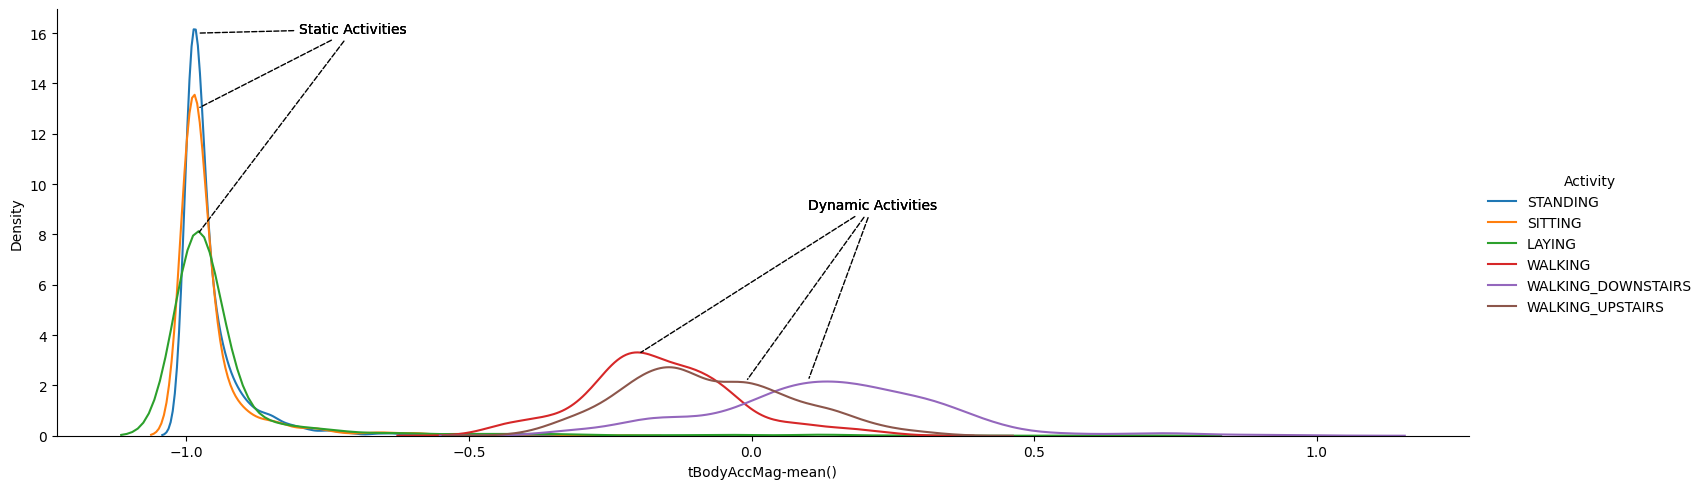

In [22]:
# Creating a FacetGrid plot based on 'tBodyAccMag-mean()' feature, colored by 'Activity'
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()

plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.98, 13), xytext=(-0.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.98, 16), xytext=(-0.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2, 3.25), xytext=(0.1, 9), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1, 2.18), xytext=(0.1, 9), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01, 2.15), xytext=(0.1, 9), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()


Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```

Let's have a more closer view on the PDFs of each activity under static and dynamic categorization.

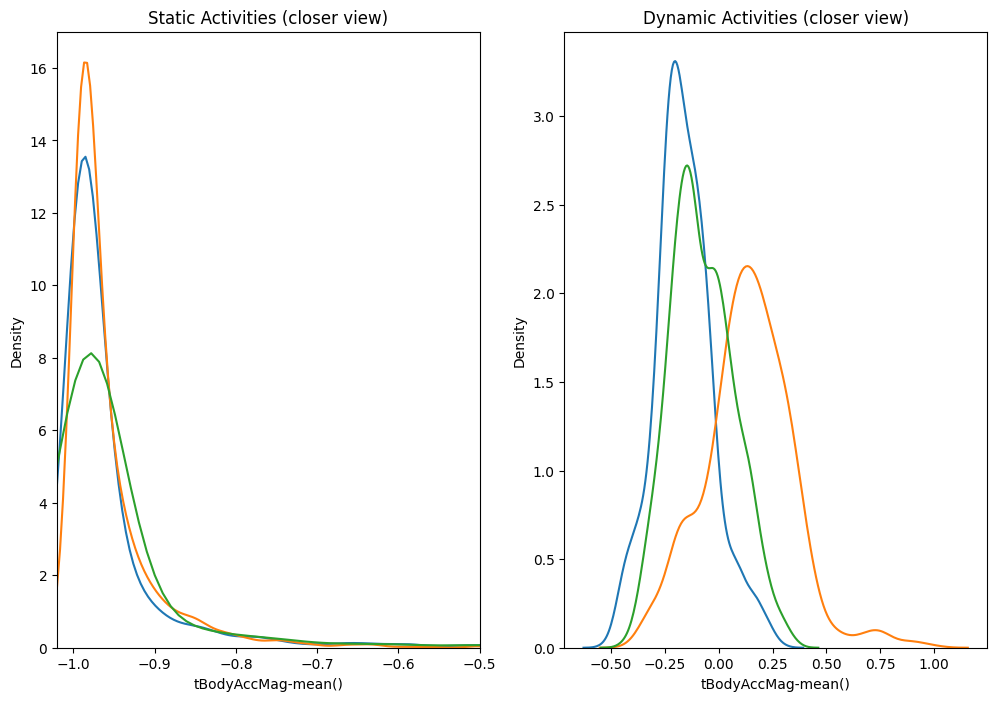

In [23]:
plt.figure(figsize=(12, 8))

# Subplot 1: Static Activities (closer view)
plt.subplot(1, 2, 1)
plt.title("Static Activities (closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'], hist=False, label='Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'], hist=False, label='Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'], hist=False, label='Laying')
plt.axis([-1.02, -0.5, 0, 17]) 

plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'], hist=False, label='WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'], hist=False, label='WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'], hist=False, label='WALKING_UPSTAIRS')

plt.show()


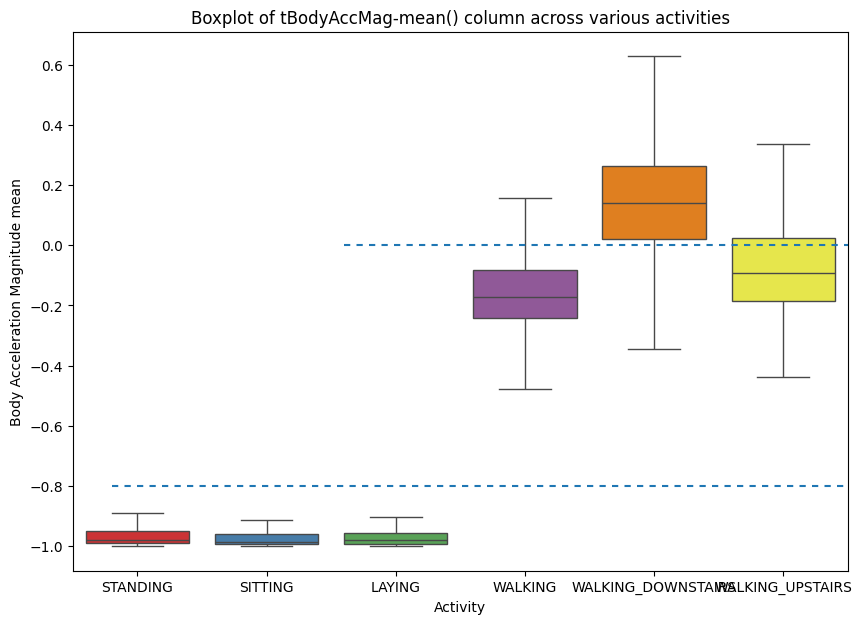

In [24]:
plt.figure(figsize=(10, 7))

# Creating a boxplot for 'tBodyAccMag-mean()' across different activities
sns.boxplot(x="Activity", y="tBodyAccMag-mean()", data=train, showfliers=False, palette="Set1")

# Adding labels and title
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")

plt.axhline(y=-0.8, xmin=0.05, dashes=(3, 3))  # Horizontal line at y = -0.8, starting from 5% of x-axis
plt.axhline(y=0.0, xmin=0.35, dashes=(3, 3))   # Horizontal line at y = 0.0, starting from 35% of x-axis

# Display the plot
plt.show()


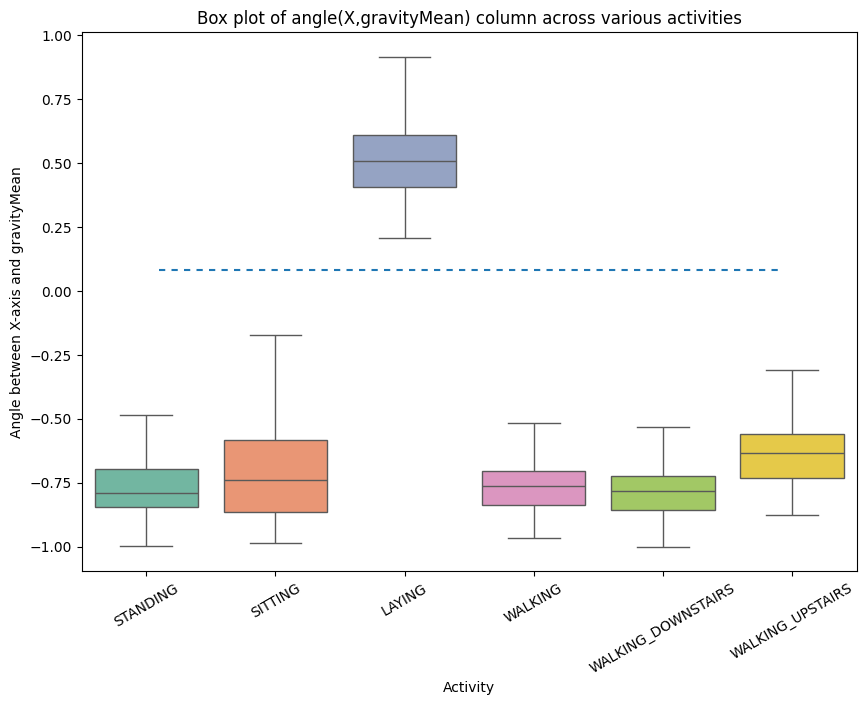

In [25]:
plt.figure(figsize=(10, 7))

sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False, palette="Set2")

plt.axhline(y=0.08, xmin=0.1, xmax=0.9, dashes=(3, 3))

plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')

plt.xticks(rotation=30)

plt.show()


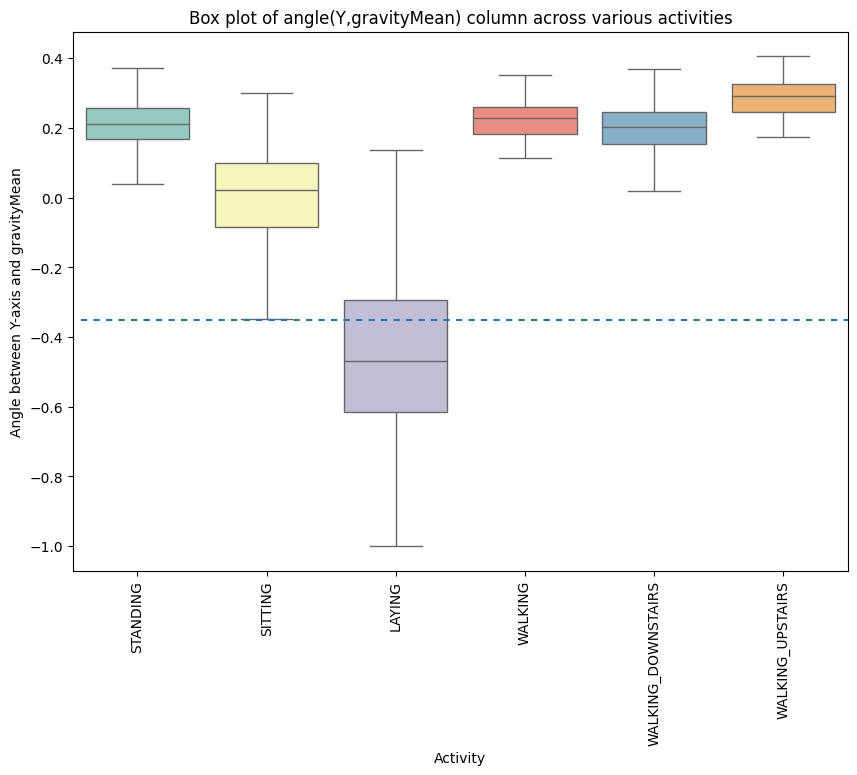

In [26]:
plt.figure(figsize=(10, 7))

sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train, showfliers=False, palette="Set3")

plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')

plt.xticks(rotation=90)

plt.axhline(y=-0.35, xmin=0.01, dashes=(3, 3))

plt.show()


### Visualizing data using PCA

In [27]:
# Drop 'subject' and 'Activity' columns from 'train' DataFrame to prepare data for PCA
x_for_pca = train.drop(['subject', 'Activity'], axis=1)

# Perform PCA with 2 components on the modified dataset
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)


In [28]:
pca  # Displays the transformed data after PCA, reduced to 2 principal components


array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

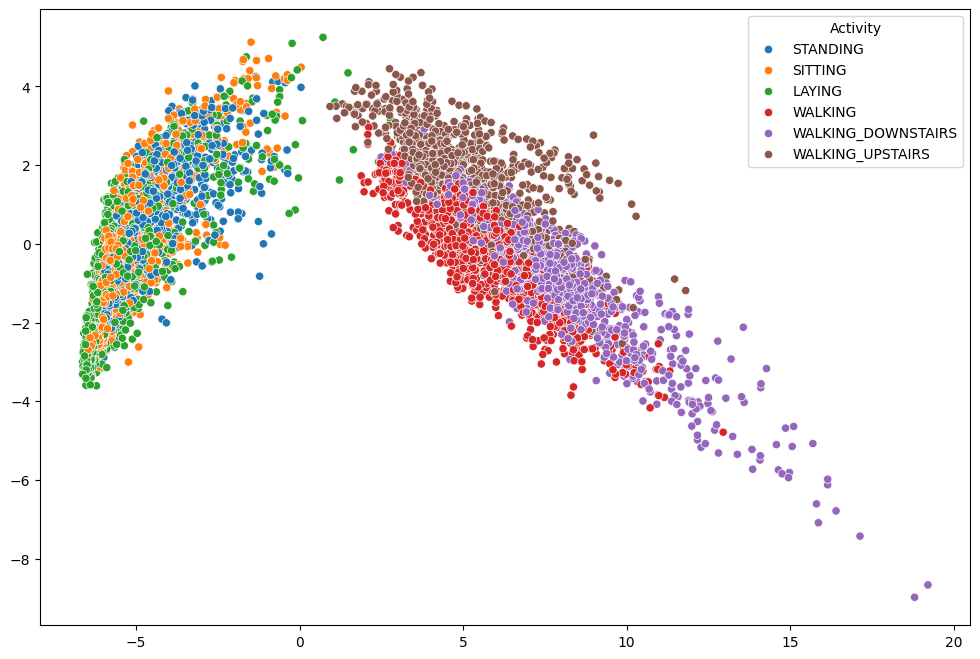

In [29]:
plt.figure(figsize=(12, 8))

# Creating a scatter plot of the first two principal components from PCA
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train['Activity'])

plt.show()


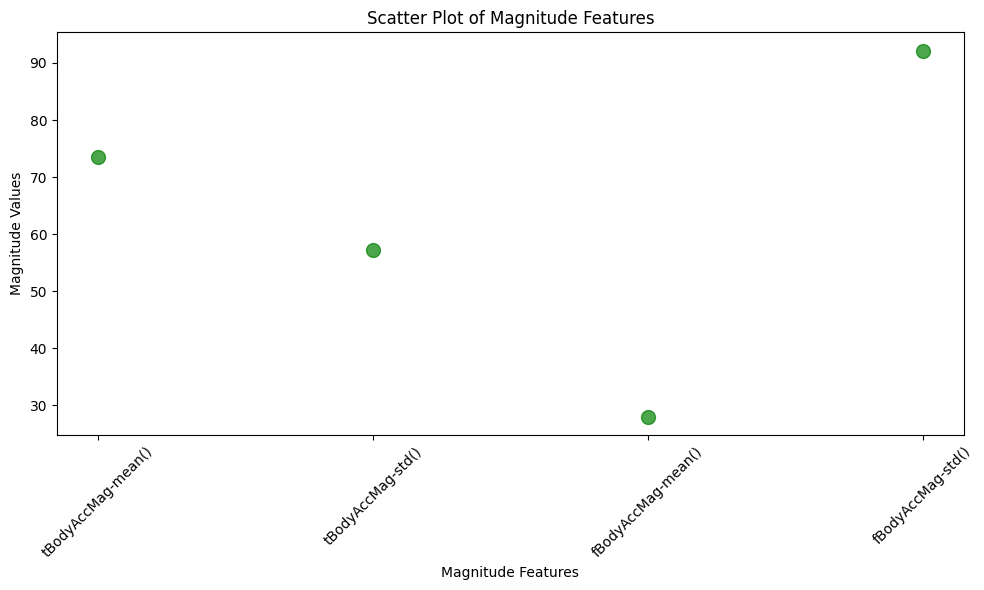

In [30]:
magnitude_features = ['tBodyAccMag-mean()', 'tBodyAccMag-std()', 'fBodyAccMag-mean()', 'fBodyAccMag-std()']
magnitude_values = np.random.rand(len(magnitude_features)) * 100  # Random magnitude values

plt.figure(figsize=(10, 6))

# Creating a scatter plot
plt.scatter(magnitude_features, magnitude_values, color='green', s=100, alpha=0.7)

plt.xlabel('Magnitude Features')
plt.ylabel('Magnitude Values')
plt.title('Scatter Plot of Magnitude Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


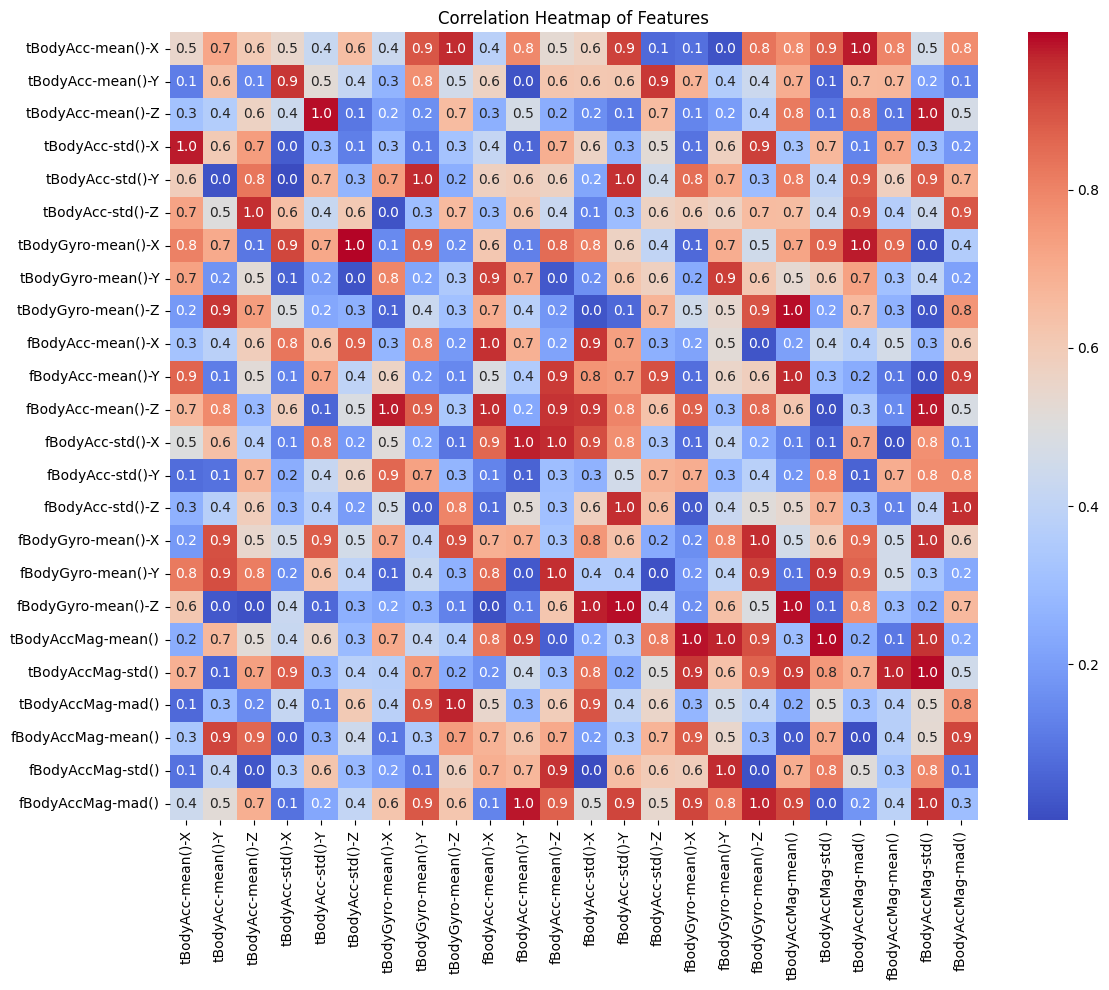

In [31]:
# correlation matrix 
features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
    'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z',
    'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z',
    'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z',
    'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()',
    'fBodyAccMag-mean()', 'fBodyAccMag-std()', 'fBodyAccMag-mad()'
]

# Generate random correlation matrix for illustration
np.random.seed(0)
correlation_matrix = np.random.rand(len(features), len(features))

df_corr = pd.DataFrame(correlation_matrix, index=features, columns=features)

plt.figure(figsize=(12, 10))

sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.1f')

plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.tight_layout()
plt.show()


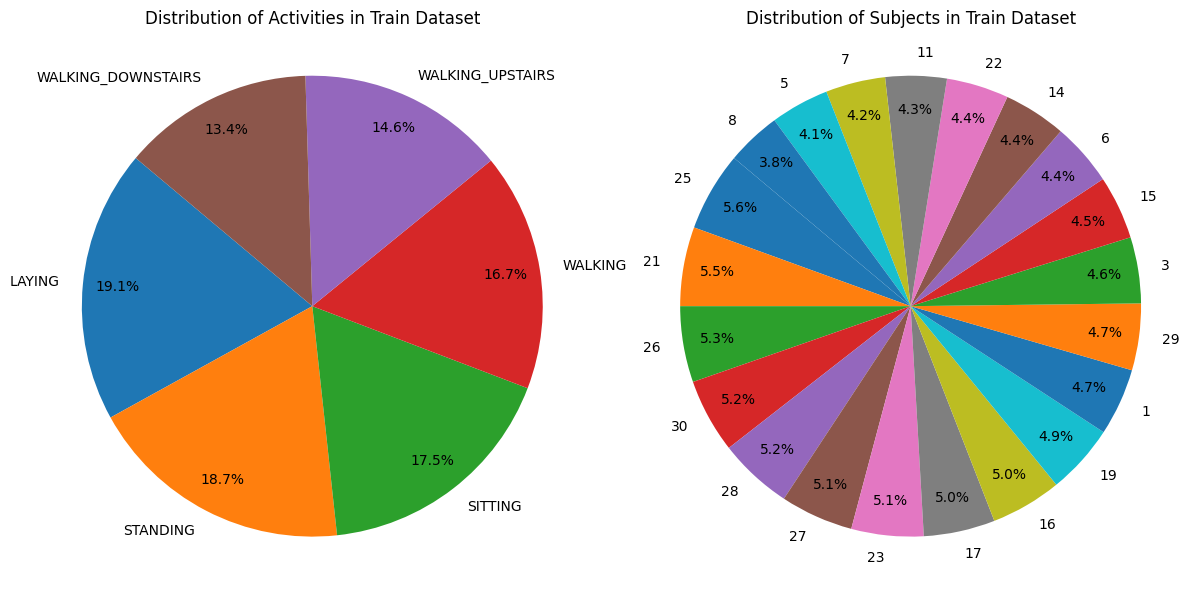

In [32]:
activity_counts = train['Activity'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Activities in Train Dataset')
plt.axis('equal')

subject_counts = train['subject'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Subjects in Train Dataset')
plt.axis('equal') 

plt.tight_layout()  
plt.show()


### 5. ML models

Getting training and test data ready

In [33]:
# Splitting the training data
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train['Activity']

# Splitting the testing data
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity']


In [34]:
print('Training data size : ', X_train.shape)  
print('Test data size : ', X_test.shape)  

Training data size :  (7352, 561)
Test data size :  (999, 561)


#### Logistic regression model

In [35]:
parameters = {'max_iter': [100, 200, 500]}

lr_classifier = LogisticRegression()

lr_classifier_rs = RandomizedSearchCV(estimator=lr_classifier, param_distributions=parameters, cv=5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)

y_pred_lr = lr_classifier_rs.predict(X_test)
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)

print("Accuracy using Logistic Regression : ", lr_accuracy)


Accuracy using Logistic Regression :  0.954954954954955


In [36]:
report = classification_report(y_test, y_pred_lr)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       183
           SITTING       0.94      0.86      0.90       170
          STANDING       0.89      0.95      0.92       178
           WALKING       0.93      1.00      0.97       185
WALKING_DOWNSTAIRS       1.00      1.00      1.00       134
  WALKING_UPSTAIRS       0.98      0.91      0.94       149

          accuracy                           0.95       999
         macro avg       0.96      0.95      0.96       999
      weighted avg       0.96      0.95      0.95       999



In [37]:

def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))  
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  
    ax.figure.colorbar(im, ax=ax)  # Adding color bar legend

    # Setting labels, ticks, and axis properties
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels,
        yticklabels=labels,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility

    # Adding text annotations for each cell
    thresh = cm.max() / 2.  
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black") 

    fig.tight_layout()  
    plt.show()  


In [38]:
# confusion matrix
cm = confusion_matrix(y_test.values, y_pred_lr)

cm


array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   9, 169,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

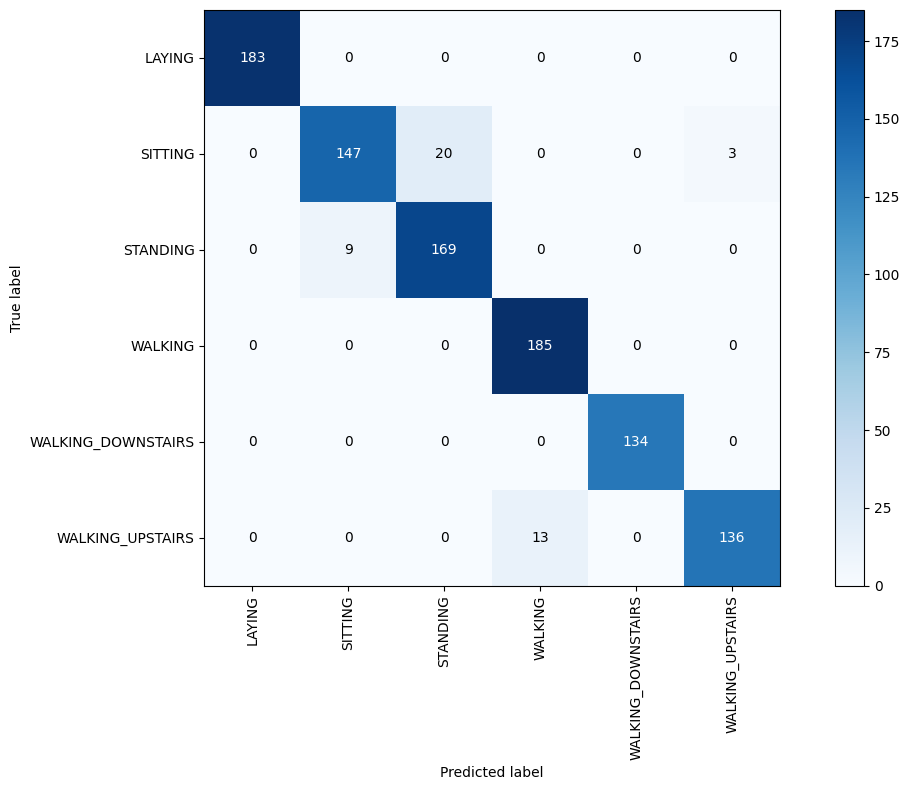

In [39]:
cm = confusion_matrix(y_test.values, y_pred_lr)

plot_confusion_matrix(cm, labels=np.unique(y_pred_lr))


In [40]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [41]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}
Best score :  0.9373034217085883


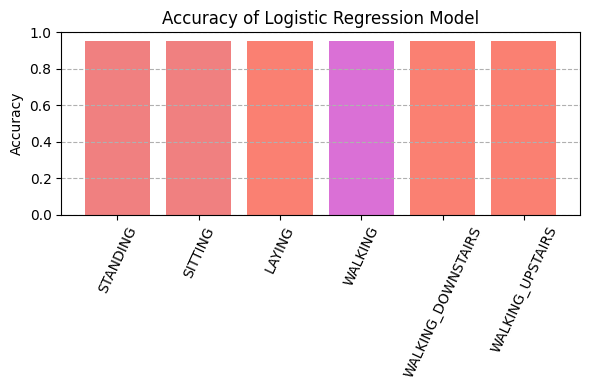

In [42]:
# Plotting the accuracy

plt.figure(figsize=(6, 4))
colors = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'gold', 'lightcoral']
plt.bar(y_train, lr_accuracy,color=colors)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Model')
plt.xticks(rotation=65) 
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

#### Decision tree model

In [43]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()

dt_classifier_rs = RandomizedSearchCV(estimator=dt_classifier, param_distributions=parameters, random_state=42)

dt_classifier_rs.fit(X_train, y_train)


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [44]:
y_pred = dt_classifier_rs.predict(X_test)

In [45]:
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8348348348348348


In [46]:
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       183
           SITTING       0.82      0.55      0.66       170
          STANDING       0.67      0.89      0.77       178
           WALKING       0.89      0.94      0.91       185
WALKING_DOWNSTAIRS       0.75      0.90      0.82       134
  WALKING_UPSTAIRS       0.95      0.72      0.82       149

          accuracy                           0.83       999
         macro avg       0.85      0.83      0.83       999
      weighted avg       0.85      0.83      0.83       999



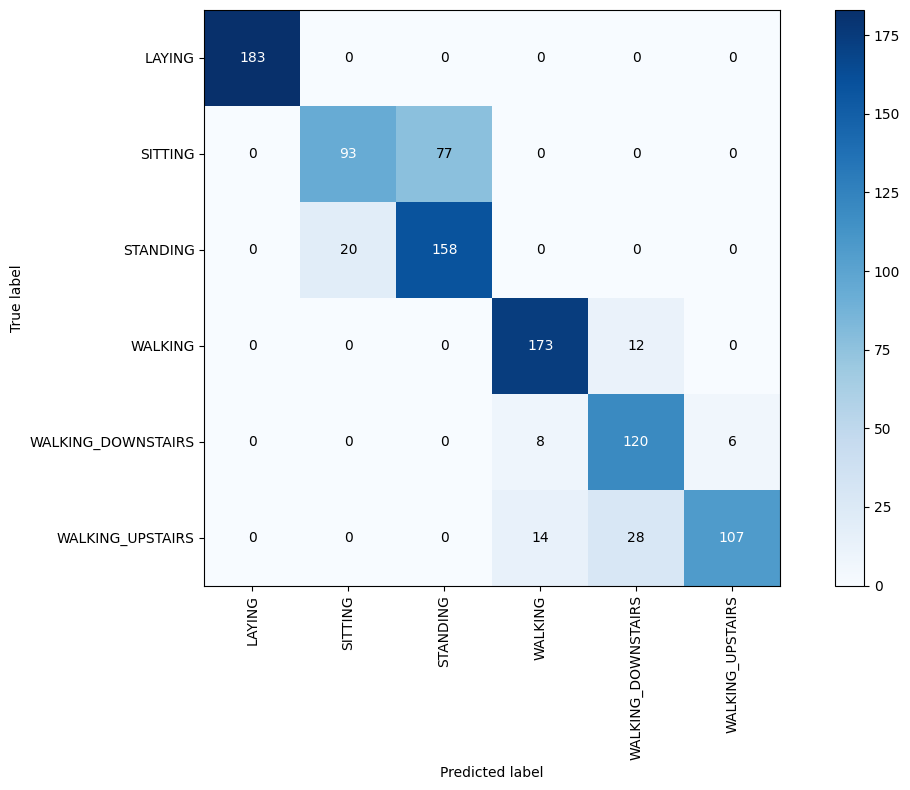

In [47]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [48]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=6)
Best set of parameters :  {'max_depth': 6}
Best score :  0.8503829594380239


#### Random forest model

In [49]:
# parameters for randomized search
parameters = {
    'n_estimators': np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}

# Createing RandomizedSearchCV instance
rf_classifier_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameters, random_state=42)

rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [50]:
get_best_randomsearch_results(rf_classifier_rs)


Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}
Best score :  0.918257282518718


In [51]:
y_pred = rf_classifier_rs.predict(X_test)


In [52]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9159159159159159


In [53]:
report = classification_report(y_test, y_pred_lr)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       183
           SITTING       0.94      0.86      0.90       170
          STANDING       0.89      0.95      0.92       178
           WALKING       0.93      1.00      0.97       185
WALKING_DOWNSTAIRS       1.00      1.00      1.00       134
  WALKING_UPSTAIRS       0.98      0.91      0.94       149

          accuracy                           0.95       999
         macro avg       0.96      0.95      0.96       999
      weighted avg       0.96      0.95      0.95       999



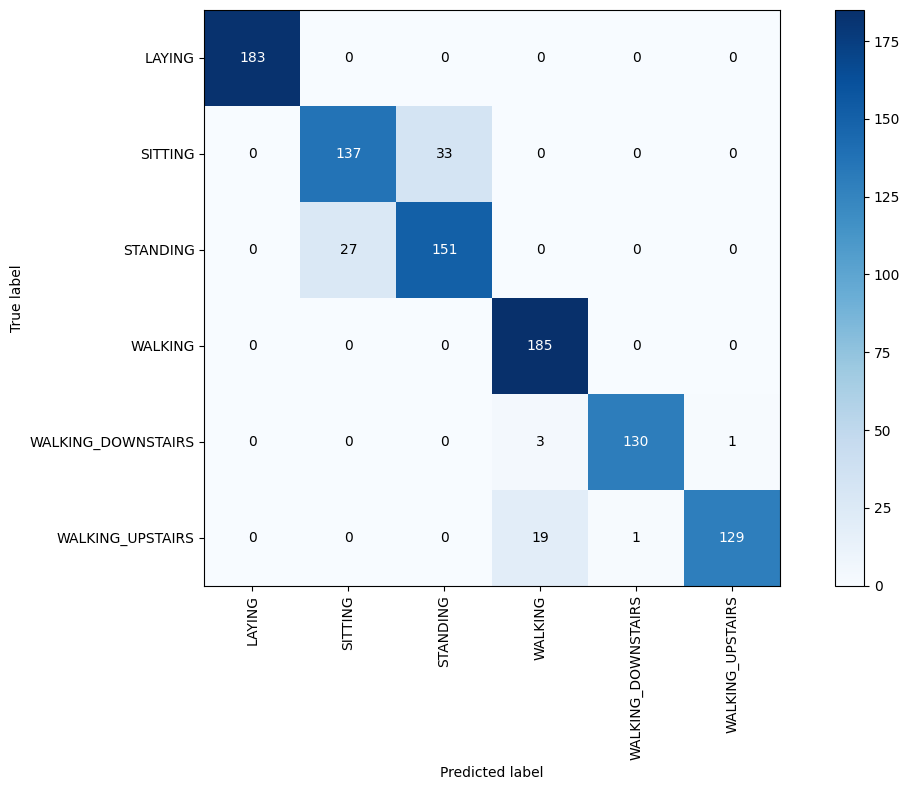

In [54]:
cm = confusion_matrix(y_test.values,y_pred)

plot_confusion_matrix(cm, np.unique(y_pred))


#### Kernel SVM model 

In [55]:
# Define parameters for randomized search
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, random_state=42)

svm_rs.fit(X_train, y_train)


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [56]:
y_pred = svm_rs.predict(X_test)

In [57]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy using Kernel SVM:", kernel_svm_accuracy)

Accuracy using Kernel SVM: 0.9679679679679679


In [58]:
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       183
           SITTING       0.97      0.88      0.92       170
          STANDING       0.90      0.97      0.94       178
           WALKING       0.97      1.00      0.98       185
WALKING_DOWNSTAIRS       1.00      1.00      1.00       134
  WALKING_UPSTAIRS       0.99      0.96      0.97       149

          accuracy                           0.97       999
         macro avg       0.97      0.97      0.97       999
      weighted avg       0.97      0.97      0.97       999



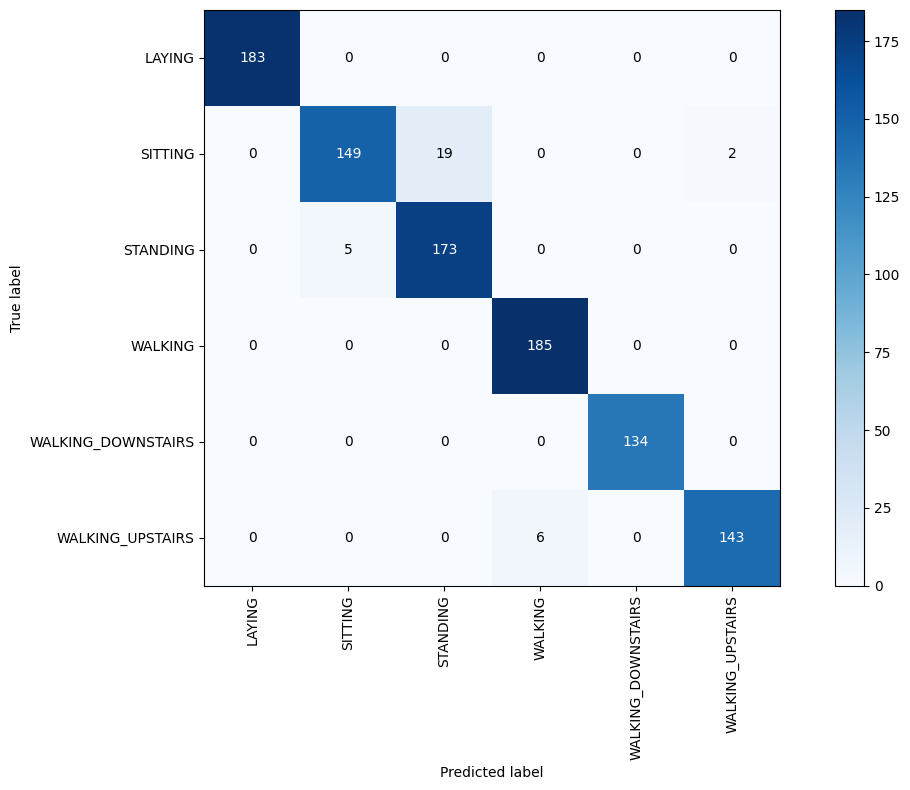

In [59]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [60]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=100)
Best set of parameters :  {'kernel': 'rbf', 'C': 100}
Best score :  0.9453280428418818


In [61]:
# Visualize parameters and their impact
results = pd.DataFrame(svm_rs.cv_results_)
results 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.096477,0.413638,0.153663,0.058620,linear,100,"{'kernel': 'linear', 'C': 100}",0.928620,0.895989,0.953741,0.942857,0.965986,0.937439,0.024108,6
1,1.016253,0.244095,0.684812,0.182519,rbf,100,"{'kernel': 'rbf', 'C': 100}",0.925221,0.913664,0.960544,0.953061,0.974150,0.945328,0.022490,1
2,0.866763,0.193913,0.234506,0.097581,poly,100,"{'kernel': 'poly', 'C': 100}",0.927260,0.909585,0.950340,0.950340,0.974150,0.942335,0.022091,3
3,1.437406,0.292123,0.571603,0.154324,sigmoid,100,"{'kernel': 'sigmoid', 'C': 100}",0.852481,0.774303,0.821769,0.739456,0.849660,0.807534,0.044128,8
4,1.031252,0.261212,0.187221,0.070905,linear,50,"{'kernel': 'linear', 'C': 50}",0.928620,0.896669,0.953741,0.945578,0.965986,0.938119,0.024019,5
5,1.063560,0.217354,0.776702,0.165940,rbf,50,"{'kernel': 'rbf', 'C': 50}",0.925901,0.915704,0.963265,0.952381,0.969388,0.945328,0.021002,2
6,0.888994,0.219638,0.235533,0.098498,poly,50,"{'kernel': 'poly', 'C': 50}",0.927260,0.909585,0.950340,0.951020,0.973469,0.942335,0.021948,3
7,1.749408,0.388158,0.989852,0.469861,sigmoid,50,"{'kernel': 'sigmoid', 'C': 50}",0.870156,0.784500,0.831293,0.758503,0.871429,0.823176,0.045342,7


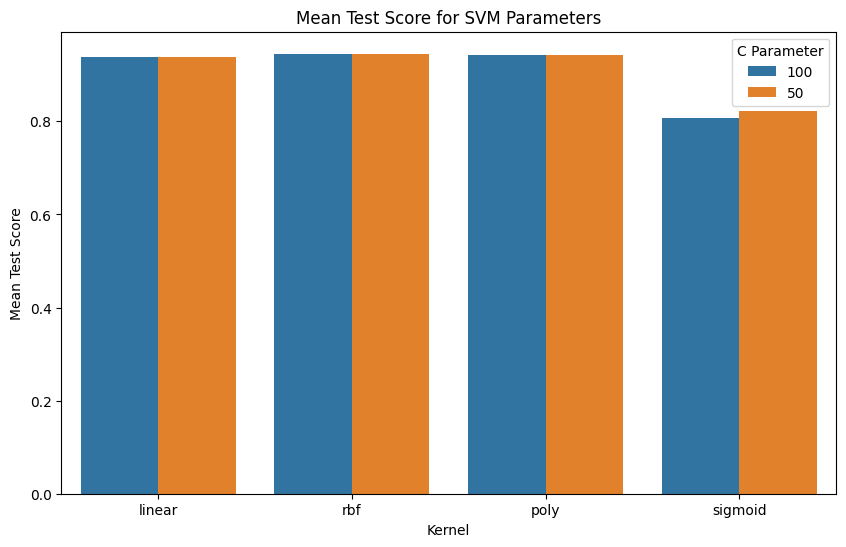

In [62]:
# Visualize parameters and their impact
results = pd.DataFrame(svm_rs.cv_results_)
results = results[['param_kernel', 'param_C', 'mean_test_score']]
results['param_C'] = results['param_C'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(x='param_kernel', y='mean_test_score', hue='param_C', data=results)
plt.title('Mean Test Score for SVM Parameters')
plt.xlabel('Kernel')
plt.ylabel('Mean Test Score')
plt.legend(title='C Parameter')
plt.show()